# Caffeinated Rest

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

## Loading data

To fetch the data to your local machine, run:
```
./fetch_data.sh
```

Loading the data:
- helpers for loading/processing data in `load_data.py`
- load combined scrubbed timeseries with `load_data.load_scrubbed`


Notes:
- `load_scrubbed` returns a dataset of {data, meta, X, y}
    - data and meta are pandas.DataFrames
    - X and y are numpy.ndarrays 

### Load as list of datasets per session

In [3]:
from load_data import load_scrubbed

# load some data
sessions = load_scrubbed(n_sessions=3, merge=False)

INFO:load_data:load_scrubbed(**{'n_sessions': 3, 'merge': False})
INFO:load_data:Loading data...
INFO:root:  [+] session: 1, path: data/base/combined_data_scrubbed/sub014.txt
INFO:root:  [+] session: 2, path: data/base/combined_data_scrubbed/sub015.txt
INFO:root:  [+] session: 3, path: data/base/combined_data_scrubbed/sub016.txt


In [4]:
# print some info
for i, session in enumerate(sessions, start=0):
    print("session = sessions[{}]".format(i))
    for attr in ['data', 'meta', 'X', 'y']:
        print("session.{:8s} = {}\t{}".format(
            attr, np.shape(dict(session)[attr]), type(dict(session)[attr])
        ))
    print()

session = sessions[0]
session.data     = (518, 630)	<class 'pandas.core.frame.DataFrame'>
session.meta     = (518, 3)	<class 'pandas.core.frame.DataFrame'>
session.X        = (518, 630)	<class 'numpy.ndarray'>
session.y        = (518, 3)	<class 'numpy.ndarray'>

session = sessions[1]
session.data     = (518, 630)	<class 'pandas.core.frame.DataFrame'>
session.meta     = (518, 3)	<class 'pandas.core.frame.DataFrame'>
session.X        = (518, 630)	<class 'numpy.ndarray'>
session.y        = (518, 3)	<class 'numpy.ndarray'>

session = sessions[2]
session.data     = (518, 630)	<class 'pandas.core.frame.DataFrame'>
session.meta     = (518, 3)	<class 'pandas.core.frame.DataFrame'>
session.X        = (518, 630)	<class 'numpy.ndarray'>
session.y        = (518, 3)	<class 'numpy.ndarray'>



### Load data, meta as combined DataFrame by default

In [5]:
from load_data import load_scrubbed

# load some data
data = load_scrubbed(n_sessions=3)

INFO:load_data:load_scrubbed(**{'n_sessions': 3})
INFO:load_data:Loading data...
INFO:root:  [+] session: 1, path: data/base/combined_data_scrubbed/sub014.txt
INFO:root:  [+] session: 2, path: data/base/combined_data_scrubbed/sub015.txt
INFO:root:  [+] session: 3, path: data/base/combined_data_scrubbed/sub016.txt


In [6]:
# print some info
for attr in ['data', 'meta', 'X', 'y']:
    print("data.{:8s} = {}\t{}".format(
        attr, np.shape(dict(data)[attr]), type(dict(data)[attr])
    ))

data.data     = (1554, 630)	<class 'pandas.core.frame.DataFrame'>
data.meta     = (1554, 3)	<class 'pandas.core.frame.DataFrame'>
data.X        = (1554, 630)	<class 'numpy.ndarray'>
data.y        = (1554, 3)	<class 'numpy.ndarray'>


### Visual inspection of data

#### Plot all ROIs, timeseries over all sessions

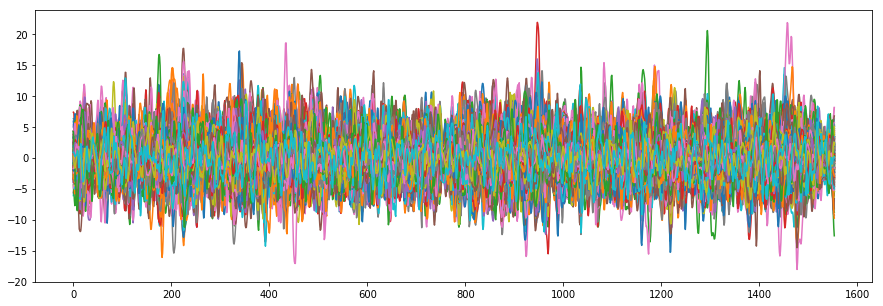

In [7]:
data.data.iloc[:, :].plot(subplots=False, figsize=(15,5), legend=False)

#### Plot 5 ROIs, timeseries over all sessions

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11461cbe0>,
      dtype=object)

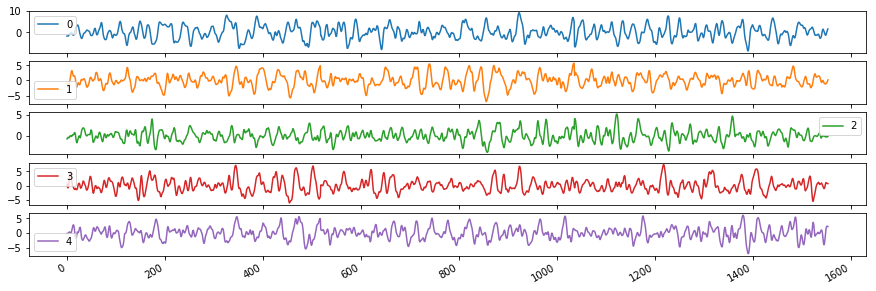

In [8]:
# plot all timeseries, over 5 ROIs, over all sessions
data.data.iloc[:, :5].plot(subplots=True, figsize=(15,5))

#### Plot meta data over all sessions

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11461c0b8>,
      dtype=object)

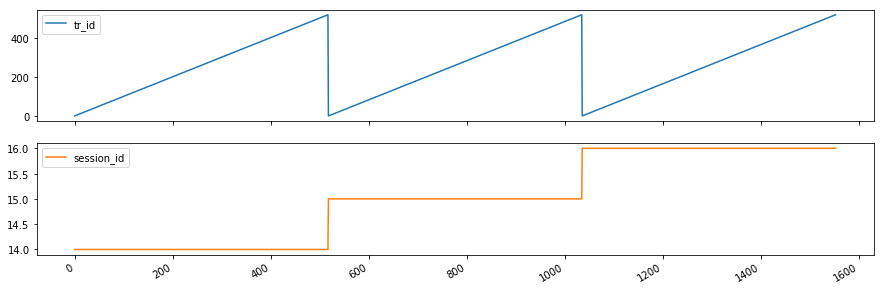

In [9]:
data.meta.iloc[:, :].plot(subplots=True, figsize=(15,5))

#### Scatter plots of data over time and sessions

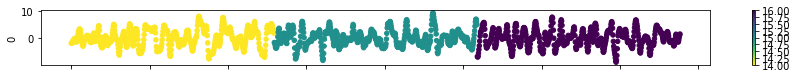

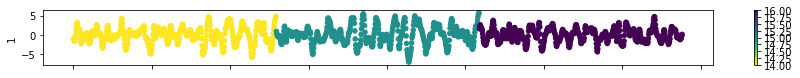

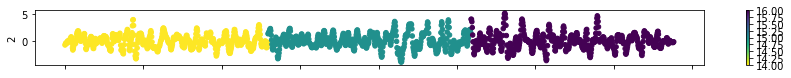

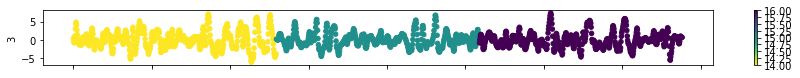

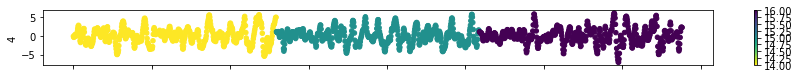

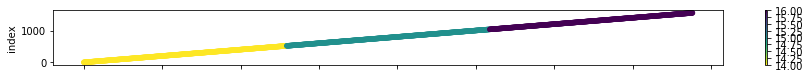

In [10]:
# plot all timeseries, over 5 ROIs, over all sessions
subset = data.data.iloc[:, :5].assign(index = data.data.index)
for col in subset.columns:
    ax = subset.plot(
        kind='scatter', 
        x='index', y=col,
        c=data.meta.session_id.values, 
        subplots=True, 
        figsize=(15,1),
        cmap='viridis_r'
    )
    ax[0].set_ylabel(col)

#### Scatter plots of data over time (overlay sessions)

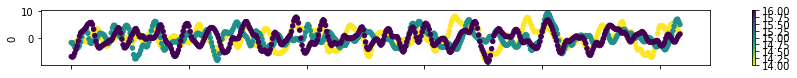

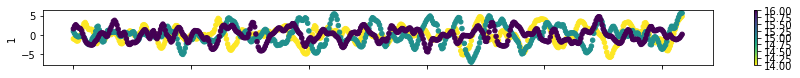

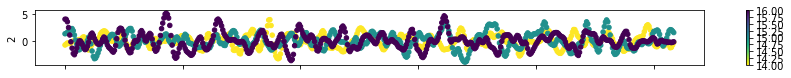

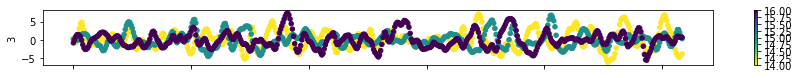

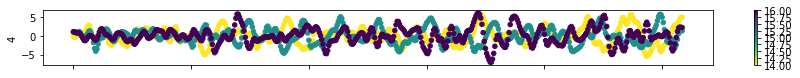

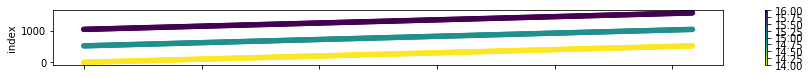

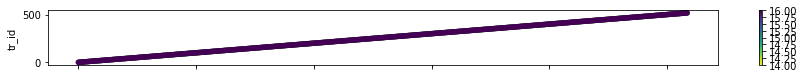

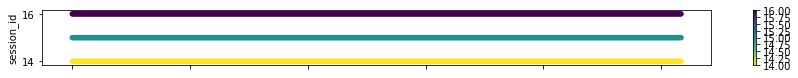

In [11]:
# plot all timeseries, over 5 ROIs, over all sessions
subset = data.data.iloc[:, :5].assign(index = data.data.index)
subset = subset.join(data.meta, how='left').set_index('session')
for col in subset.columns:
    ax = subset.plot(
        kind='scatter', 
        x='tr_id', y=col,
        c=data.meta.session_id.values, 
        subplots=True, 
        figsize=(15,1),
        cmap='viridis_r'
    )
    ax[0].set_ylabel(col)